# What are the most demanded skills for the top 3 most popular data roles?

In [ ]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
# Filter dataset to include only job listings located in Poland
df_PL = df[df['job_country'] == 'Poland']

In [ ]:
# Expand job_skills lists into separate rows
df_skills = df_PL.explode('job_skills')

# Count how often each skill appears per job title
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size().reset_index(name='skill_count')

# Sort skills by their frequency in descending order
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

In [ ]:
# Get unique job titles from skills count data, take first 3, then sort them alphabetically
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])

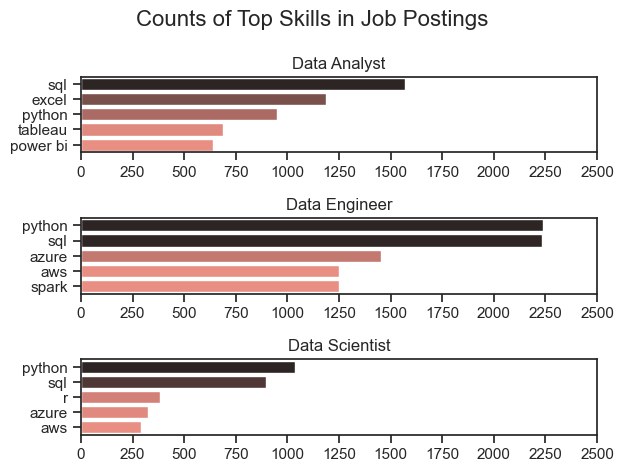

In [130]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for index, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head()
    # df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[index], title=job_title, legend=False)
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[index], hue='skill_count', palette='dark:salmon_r', legend=False)
    ax[index].set_ylabel('')
    ax[index].set_xlabel('')
    ax[index].set_xlim(0, 2500)
    ax[index].set_xticks([0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500])
    ax[index].set_title(job_title)
 
fig.suptitle('Counts of Top Skills in Job Postings', fontsize=16)    
fig.tight_layout()
plt.show()    

In [ ]:
# Count total number of job postings per job title in Poland and reset index to a DataFrame
df_job_title_count = df_PL['job_title_short'].value_counts().reset_index(name='jobs_total')

In [ ]:
# Merge skill counts with total job counts per job title
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

# Calculate percentage of job postings requiring each skill within each job title as new column
df_skills_perc['skill_percent'] = 100 * df_skills_perc['skill_count'] / df_skills_perc['jobs_total']

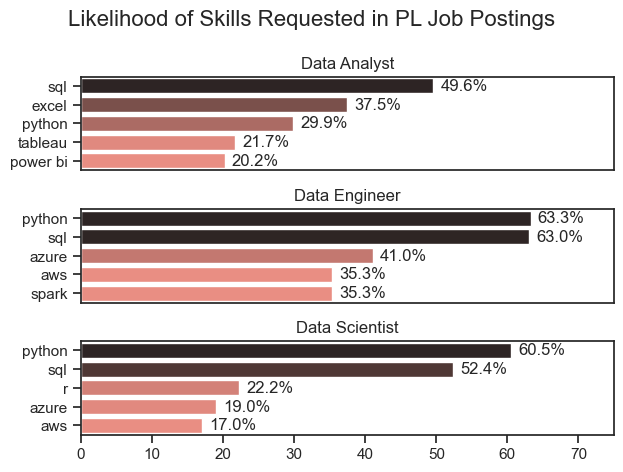

In [129]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for index, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head()
    # df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[index], title=job_title, legend=False)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[index], hue='skill_count', palette='dark:salmon_r', legend=False)
    ax[index].set_ylabel('')
    ax[index].set_xlabel('')
    ax[index].set_xlim(0, 75)
    ax[index].set_title(job_title)
    
    if index != len(job_titles) - 1:    
        ax[index].set_xticks([])
    
    for n, value in enumerate(df_plot['skill_percent']):
        ax[index].text(value + 1, n, "%.1f%%" % value, va='center')   
 
fig.suptitle('Likelihood of Skills Requested in PL Job Postings', fontsize=16)    
fig.tight_layout()
plt.show()   
